In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import warnings
warnings.filterwarnings('ignore')

In [10]:
def get_param_grid_for_model(model):
    # Example: Define hyperparameter grid for RandomForestClassifier
    if isinstance(model, RandomForestClassifier):
        return {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    # Example: Define hyperparameter grid for LogisticRegression
    elif isinstance(model, LogisticRegression):
        return {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2']
        }
    # Example: Define hyperparameter grid for SVC
    elif isinstance(model, SVC):
        return {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    else:
        # Return an empty dictionary if the model is not recognized
        return {}


In [11]:
def evaluate_model(model, y_test, y_pred):
    # Evaluate the model performance
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print the evaluation metrics
    print(f'Model: {type(model).__name__}')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:\n', classification_rep)
    print('Confusion Matrix:\n', conf_matrix)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {type(model).__name__}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [12]:
%store -r X_train X_test y_train y_test

In [13]:
print("Split the data into training(80%) and testing(20%) sets:")
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

Split the data into training(80%) and testing(20%) sets:
X_train shape:  (800, 16)
X_test shape:  (200, 16)
y_train shape:  (800,)
y_test shape:  (200,)


Model: RandomForestClassifier
Accuracy: 0.7950
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.87       141
           1       0.75      0.46      0.57        59

    accuracy                           0.80       200
   macro avg       0.78      0.70      0.72       200
weighted avg       0.79      0.80      0.78       200

Confusion Matrix:
 [[132   9]
 [ 32  27]]


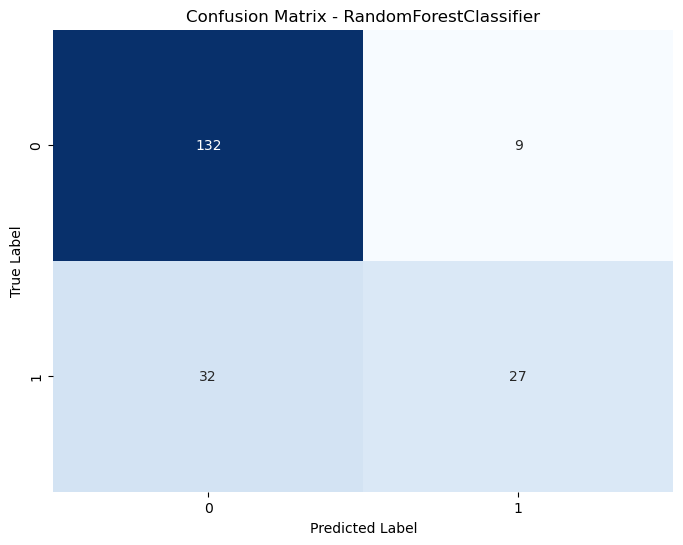

Model: LogisticRegression
Accuracy: 0.7200
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       141
           1       0.55      0.29      0.38        59

    accuracy                           0.72       200
   macro avg       0.65      0.59      0.60       200
weighted avg       0.69      0.72      0.69       200

Confusion Matrix:
 [[127  14]
 [ 42  17]]


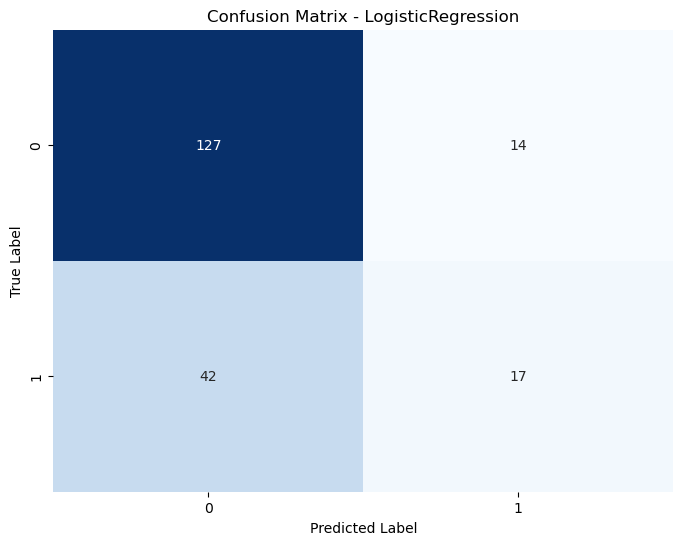

Model: DecisionTreeClassifier
Accuracy: 0.6850
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       141
           1       0.47      0.53      0.50        59

    accuracy                           0.69       200
   macro avg       0.63      0.64      0.63       200
weighted avg       0.70      0.69      0.69       200

Confusion Matrix:
 [[106  35]
 [ 28  31]]


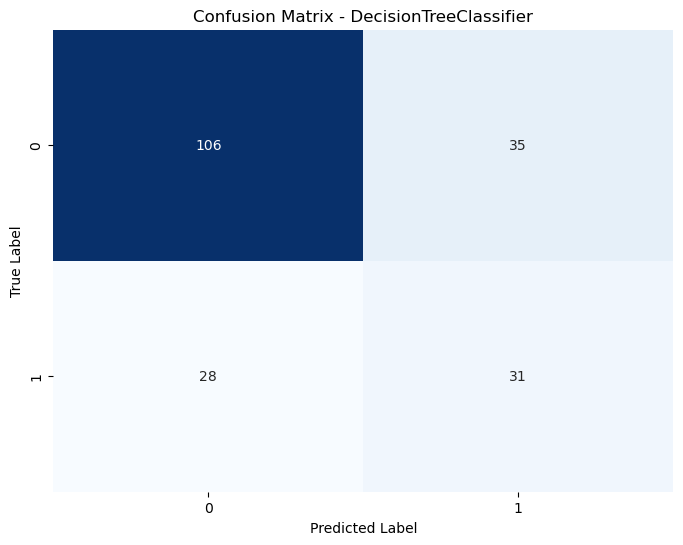

Model: GradientBoostingClassifier
Accuracy: 0.7550
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       141
           1       0.62      0.42      0.51        59

    accuracy                           0.76       200
   macro avg       0.71      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200

Confusion Matrix:
 [[126  15]
 [ 34  25]]


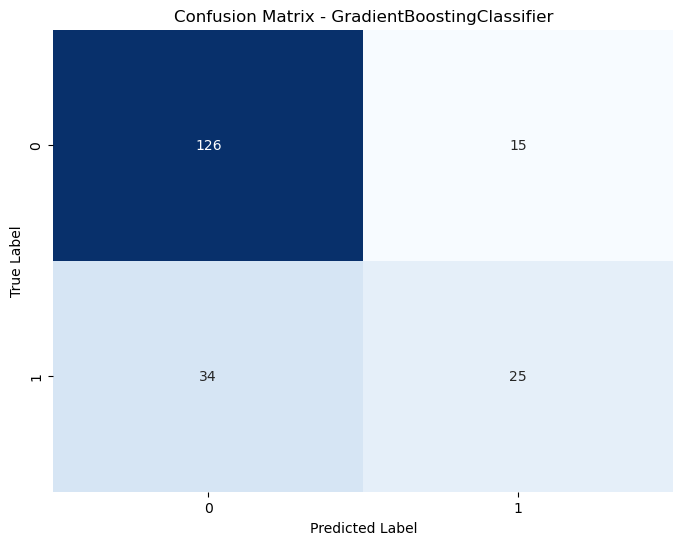

Model: KNeighborsClassifier
Accuracy: 0.6800
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79       141
           1       0.43      0.27      0.33        59

    accuracy                           0.68       200
   macro avg       0.58      0.56      0.56       200
weighted avg       0.65      0.68      0.65       200

Confusion Matrix:
 [[120  21]
 [ 43  16]]


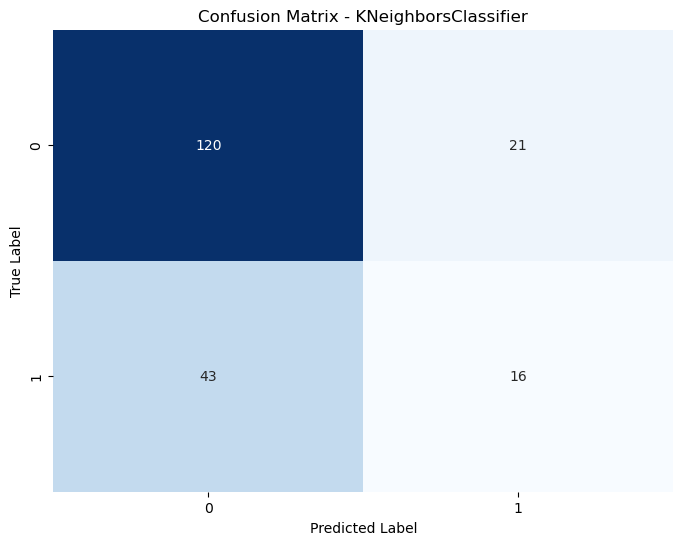

In [16]:

# Main function
def main():
    # List of machine learning models
    models = [
        RandomForestClassifier(),
        LogisticRegression(),
        # SVC()  # my system not supporting to train this model, training only above two models
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        KNeighborsClassifier()
    ]

    # loading cleaned and splitted data from 1_data_exploration.ipynb
    # %run 1_data_exploration.ipynb  # run eda jupyter here
    %store -r X_train X_test y_train y_test
    
    # Iterate through each model
    for model in models:
        # Perform hyperparameter tuning using GridSearchCV
        param_grid = get_param_grid_for_model(model)  # Define a function to get appropriate parameter grid
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Get the best model from the grid search
        best_model = grid_search.best_estimator_

        # Train the best model on the full training set
        best_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = best_model.predict(X_test)

        #evaluate model
        evaluate_model(model, y_test, y_pred)

        # Save the trained model for future use
        joblib.dump(best_model, f'{type(model).__name__}_model.pkl')

    

if __name__ == "__main__":
    main()




### Results

In this project, I applied five different machine learning models to predict loan default based on historical data from a German bank. The models used include RandomForestClassifier, LogisticRegression, DecisionTreeClassifier, GradientBoostingClassifier, and KNeighborsClassifier. The dataset was split into training (80%) and testing (20%) sets, and each model underwent hyperparameter tuning using GridSearchCV to optimize its performance.

The key findings from the models are summarized below:

1. **RandomForestClassifier:**
   - Accuracy: 79.50%
   - Precision for default (class 1): 75%
   - Recall for default (class 1): 46%
   - F1-score for default (class 1): 57%
   - The confusion matrix shows that the model is better at predicting non-default cases (class 0) compared to default cases.

2. **LogisticRegression:**
   - Accuracy: 72.00%
   - Precision for default (class 1): 55%
   - Recall for default (class 1): 29%
   - F1-score for default (class 1): 38%
   - The logistic regression model exhibits lower accuracy and predictive performance, especially in identifying default cases.

3. **DecisionTreeClassifier:**
   - Accuracy: 68.50%
   - Precision for default (class 1): 47%
   - Recall for default (class 1): 53%
   - F1-score for default (class 1): 50%
   - The decision tree model provides intermediate performance, with balanced accuracy and recall for default cases.

4. **GradientBoostingClassifier:**
   - Accuracy: 75.50%
   - Precision for default (class 1): 62%
   - Recall for default (class 1): 42%
   - F1-score for default (class 1): 51%
   - The gradient boosting model shows competitive accuracy and precision but struggles with recall for default cases.

5. **KNeighborsClassifier:**
   - Accuracy: 68.00%
   - Precision for default (class 1): 43%
   - Recall for default (class 1): 27%
   - F1-score for default (class 1): 33%
   - The k-nearest neighbors model demonstrates lower accuracy and recall, indicating challenges in identifying default instances.

These results provide an initial overview of the model performances. The subsequent discussion will delve into the interpretation of these findings, considering the strengths and limitations of each model and potential directions for future improvements.
